In [97]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl
import json
import os
import statsmodels.api as sm
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


###Problem background

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

### Importing data and creating subsets by gender

In [34]:
url='http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/'
allmales = {}
allfemales = {}

allmales['all'] = pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)
allmales['white'] = pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black'] = pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic'] = pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian'] = pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)

###Data exploration

In [87]:
# from pandas.tools.plotting import scatter_matrix
# scatter_matrix(allmales['all'], alpha=0.2, figsize=(10, 10), diagonal='kde')
# allmales['all'].head(10)

###Data cleanup

In [12]:
for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


###Comparing the medians of the gender and race subsets

In [37]:
m_all_med = allmales['all']['Median income'][1]
m_white_med = allmales['white']['Median income'][1]
m_black_med = allmales['black']['Median income'][1]
m_hispanic_med = allmales['hispanic']['Median income'][1]
m_asian_med = allmales['asian']['Median income'][1]
print [m_all_med, m_white_med, m_black_med, m_hispanic_med, m_asian_med]

f_all_med = allfemales['all']['Median income'][1]
f_white_med = allfemales['white']['Median income'][1]
f_black_med = allfemales['black']['Median income'][1]
f_hispanic_med = allfemales['hispanic']['Median income'][1]
f_asian_med = allfemales['asian']['Median income'][1]
print [f_all_med, f_white_med, f_black_med, f_hispanic_med, f_asian_med]

[35228, 40122, 24855, 25411, 40153]
[22063, 23780, 20044, 17762, 24840]


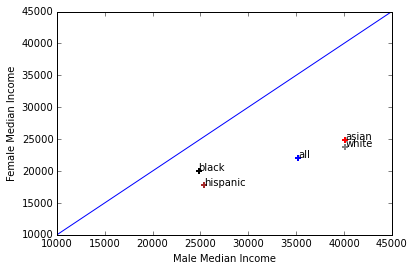

In [86]:
x=numpy.arange(10000,45000,1)
pl.plot(x,x)
pl.xlabel('Male Median Income')
pl.ylabel('Female Median Income')

pl.plot(m_all_med, f_all_med, '+', color='blue', mew=2)
pl.annotate('all', xy=(m_all_med, f_all_med), xytext=(m_all_med+50, f_all_med+50))

pl.plot(m_white_med, f_white_med, '+', color='grey', mew=2)
pl.annotate('white', xy=(m_white_med, f_white_med), xytext=(m_white_med+50, f_white_med+50))

pl.plot(m_black_med, f_black_med, '+', color='black', mew=2)
pl.annotate('black', xy=(m_black_med, f_black_med), xytext=(m_black_med+50, f_black_med+50))

pl.plot(m_hispanic_med, f_hispanic_med, '+', color='brown', mew=2)
pl.annotate('hispanic', xy=(m_hispanic_med, f_hispanic_med), xytext=(m_hispanic_med+50, f_hispanic_med+50))

pl.plot(m_asian_med, f_asian_med, '+', color='red', mew=2)
pl.annotate('asian', xy=(m_asian_med, f_asian_med), xytext=(m_asian_med+50, f_asian_med+50))

###Fitting a line to the data

In [101]:
x1 = sm.add_constant(allfemales['all']['Median income'][:])
mod = sm.OLS(allmales['all']['Median income'][:],x1).fit()
print mod.summary()

TypeError: coercing to Unicode: need string or buffer, int found

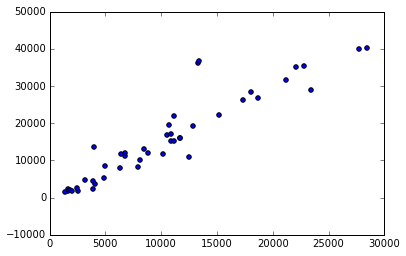

In [21]:
pl.scatter(allfemales['all']['Median income'][:],allmales['all']['Median income'][:])

In [88]:
# pl.plot(newx,np.poly1d(np.ployfit(allmales['all']['Median income'][:],allfemales['all']['Median income'][:],1))(newx)

SyntaxError: unexpected EOF while parsing (<ipython-input-88-a0354cb78b57>, line 1)

In [95]:
cor = stats.spearmanr(all_males, all_females)
all_males.std()/all_females.std()
beta1=cor[0]*all_females.std()/all_males.std()
beta0=all_females.mean()-beta1*all_males.mean()

NameError: name 'all_males' is not defined